# 导师制名企实训班商业智能方向 004期 Lesson 16

### Action 1: 基于评分卡的风控模型开发
数据集GiveMeSomeCredit，15万样本数据  
https://www.kaggle.com/c/GiveMeSomeCredit/data  
使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明   
–基本属性：包括了借款人当时的年龄  
– 偿债能力：包括了借款人的月收入、负债比率  
– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数  
– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。  
– 其他因素：包括了借款人的家属数量  

### Step1，数据探索性分析

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 数据加载
df_train = pd.read_csv('data/cs-training.csv')
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# 去掉第一列
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

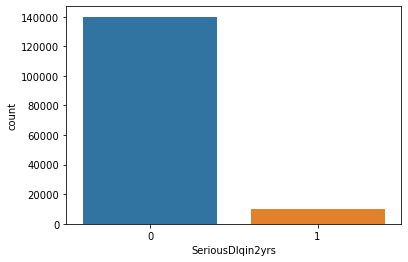

In [5]:
# 违约率SeriousDlqin2yrs进行可视化
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs', data=df_train)

In [6]:
# 查看SeriousDlqin2yrs字段比例
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

### Step2，数据缺失值填充，采用简单规则，如使用中位数进行填充

In [7]:
# 查看缺失值
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

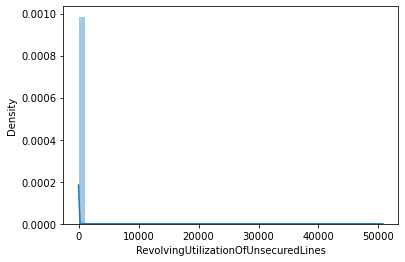

In [9]:
# 直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [10]:
# 均值
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [11]:
# 中位数
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [12]:
# 使用中位数进行缺失值填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Step3，变量分箱

#### 数据分箱
1. 对于age字段，分成6段

[-math.inf, 25, 40, 50, 60, 70, math.inf]   

2. 对于NumberOfDependents（家属人数）字段，分成6段

[-math.inf,2,4,6,8,10,math.inf]  

3. 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段

[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]    

4. 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [13]:
# 将age字段进行分箱
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'], bins=age_bins)
df_train[['age', 'bin_age']].head()

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"


In [14]:
# 对家属人数字段进行分箱
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents', 'bin_NumberOfDependents']].head()

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"


In [15]:
# 对于3种逾期次数，即
#NumberOfTime30-59DaysPastDueNotWorse，
#NumberOfTime60-89DaysPastDueNotWorse，
#NumberOfTimes90DaysLate，分成10段
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

In [16]:
# 查看分箱情况
df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [17]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')
loans_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loans_bins)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"


In [18]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

### Step4，特征筛选

In [19]:
import numpy as np
# 计算IV， 衡量变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    # 对feature字段中的每个分箱取值进行遍历
    for i in range(df[feature].nunique()):
        # 得到feature字段的第i个分箱取值val
        val = list(df[feature].unique())[i]
        # 统计feature, feature_value, 这个value的个数，这个value导致target=1的个数
        lst.append([feature, val, df[df[feature]==val].count()[feature], df[(df[feature]==val) & (df[target]==1)].count()[feature]])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]
    # 这个value所占比例
    data['Share'] = data['All'] / data['All'].sum()
    # 这个value导致bad情况，在该value个数的比例
    data['Bad Rate'] = data['Bad'] / data['All']
    # Margin Bad
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    # Margin Good
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe'] * (data['Margin Bad'] - data['Margin Good'])).sum()
    # 按照Variable，Value进行排序
    data.sort_values(by=['Variable', 'Value'])
    return data['iv'].values[0]

In [20]:
cal_IV(df_train, 'bin_age', 'SeriousDlqin2yrs')

0.24041120302785982

In [21]:
# 计算每个字段的IV值
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


## 只选择iv>0.1的，入选字段有5个：
* bin_age
* bin_NumberOfTime30-59DaysPastDueNotWorse
* bin_NumberOfTime60-89DaysPastDueNotWorse
* bin_NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines

In [22]:
feature_cols = ['bin_age', 
                'bin_NumberOfTime30-59DaysPastDueNotWorse',
                'bin_NumberOfTime60-89DaysPastDueNotWorse',
                'bin_NumberOfTimes90DaysLate',
                'bin_RevolvingUtilizationOfUnsecuredLines']

### Step5，对于筛选出来的特征，计算每个bin的WOE值

In [23]:
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        # log1p可以避免分母为0的情况
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe, on=f, how='left')
    return df_new

In [24]:
# 计算这些特征的woe
df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')
df_woe.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037


In [25]:
feature_cols = ['age', 
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'RevolvingUtilizationOfUnsecuredLines']

In [26]:
# 得到woe规则 features, bin, woe
df_bin_to_woe = pd.DataFrame(columns = ['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe.head()

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848


### Step6，使用逻辑回归进行建模

In [27]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [28]:
# 数据集切分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
model = LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('accuracy_score:',accuracy_score(y_pred, y_test))
print('roc_auc_score:',roc_auc_score(y_pred, y_test))

accuracy_score: 0.9361
roc_auc_score: 0.7711361926102505


### Action 2: AI比赛：用户购买预测  
https://aistudio.baidu.com/aistudio/competition/detail/51  
数据集：train.csv 训练集，submission.csv 提交数据样例  
### 主要参考比赛baseline

## 数据预处理 - 数据集划分与特征工程

In [30]:
import numpy as np  #
import pandas as pd  #
from datetime import datetime, date, timedelta
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import time
from itertools import product
import datetime as dt
import calendar
import gc
from datetime import date, timedelta
import paddle
import paddle.fluid as fluid
import paddle.fluid.dygraph as dygraph
from paddle.fluid.dygraph import Linear
import random
import warnings
warnings.filterwarnings("ignore")

### 加载数据集

In [31]:
PATH = 'data/'
train = pd.read_csv(PATH + 'train.csv')
# train = pd.read_csv('./data/data19383/train.csv', usecols=[2, 3, 4, 6, 7, 18])
# set index to ID to avoid droping it later
# 把测试集的id列作为索引，防止误删
test  = pd.read_csv(PATH + 'submission.csv').set_index('customer_id')

In [32]:
# 训练集概况
train[['order_detail_id','order_id','order_amount','order_pay_time','is_customer_rate','order_detail_goods_num','order_detail_amount','order_detail_discount','customer_id','goods_id']].tail(10)

,order_detail_id,order_id,order_amount,order_pay_time,is_customer_rate,order_detail_goods_num,order_detail_amount,order_detail_discount,customer_id,goods_id
2306861,3685490,3238357,707.7,2013-01-24 00:24:40,0.0,2.0,179.8,298.2,2826572,1478
2306862,3685491,3238356,775.9,2012-11-11 17:35:05,0.0,1.0,126.9,172.1,2826572,2103
2306863,3685492,3238357,707.7,2013-01-24 00:24:40,0.0,1.0,0.0,29.9,2826572,3153
2306864,3685493,3238356,775.9,2012-11-11 17:35:05,0.0,1.0,74.9,105.0,2826572,1778
2306865,3685494,3238357,707.7,2013-01-24 00:24:40,0.0,1.0,94.9,104.9,2826572,2128
2306866,3685495,3238358,199.0,2013-01-10 19:24:31,0.0,1.0,59.9,139.1,2826573,1173
2306867,3685496,3238359,299.8,2013-01-27 15:00:27,0.0,1.0,0.0,59.9,2826574,2513
2306868,3685497,3238359,299.8,2013-01-27 15:00:27,0.0,1.0,89.9,150.0,2826574,998
2306869,3685498,3238360,168.0,2012-11-11 00:10:37,0.0,1.0,76.9,91.1,2826574,1423
2306870,3685499,3238361,102.0,2013-07-10 14:22:14,0.0,1.0,49.9,52.1,2826574,1043


In [33]:
len(test)

1585986

In [34]:
len(train['customer_id'][train.order_pay_time>'2013-07-31'].unique())

174770

In [35]:
len(train[train.order_pay_time<'2013-07-31'])

2078390

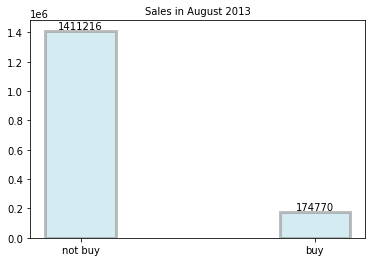

In [36]:
%matplotlib inline
y = range(1,2)
 
plt.bar(['not buy','buy'], [1585986-174770,174770], alpha=0.5, width=0.3, color='lightblue', edgecolor='grey', lw=3)
plt.title('Sales in August 2013', fontsize=10)
for a, b in zip(['not buy','buy'], [1585986-174770,174770]):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

In [37]:
# 对于特别大的文件，我们需要做一些内存检查
mem_train = train.memory_usage(index=True).sum()
mem_test=test.memory_usage(index=True).sum()
print(u"训练集使用内容 "+ str(mem_train/ 1024**2)+" MB")
print(u"测试集使用内存 "+ str(mem_test/ 1024**2)+" MB")

训练集使用内容 510.40096282958984 MB
测试集使用内存 24.200225830078125 MB


### 内存优化脚本
- 参考[缓解pandas中DataFrame占用内存过大的问题](https://blog.csdn.net/wj1066/article/details/81124959)
- 效果非常显著，有效避免内存溢出

In [38]:
# @from: https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65/code
# @liscense: Apache 2.0
# @author: weijian
def reduce_mem_usage(props):
    # 计算当前内存
    start_mem_usg = props.memory_usage().sum() / 1024 ** 2
    print("Memory usage of the dataframe is :", start_mem_usg, "MB")
    
    # 哪些列包含空值，空值用-999填充。why：因为np.nan当做float处理
    NAlist = []
    for col in props.columns:
        # 这里只过滤了objectd格式，如果你的代码中还包含其他类型，请一并过滤
        if (props[col].dtypes != object):
            
            # print("**************************")
            # print("columns: ", col)
            # print("dtype before", props[col].dtype)
            
            # 判断是否是int类型
            isInt = False
            mmax = props[col].max()
            mmin = props[col].min()
            
            # Integer does not support NA, therefore Na needs to be filled
            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(-999, inplace=True) # 用-999填充
                
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = np.fabs(props[col] - asint)
            result = result.sum()
            if result < 0.01: # 绝对误差和小于0.01认为可以转换的，要根据task修改
                isInt = True
            
            # make interger / unsigned Integer datatypes
            if isInt:
                if mmin >= 0: # 最小值大于0，转换成无符号整型
                    if mmax <= 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mmax <= 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mmax <= 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else: # 转换成有符号整型
                    if mmin > np.iinfo(np.int8).min and mmax < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mmin > np.iinfo(np.int16).min and mmax < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mmin > np.iinfo(np.int32).min and mmax < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mmin > np.iinfo(np.int64).min and mmax < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)  
            else: # 注意：这里对于float都转换成float16，需要根据你的情况自己更改
                props[col] = props[col].astype(np.float16)
            
            # print("dtype after", props[col].dtype)
            # print("********************************")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [39]:
# 处理id字段
train['order_detail_id'] = train['order_detail_id'].astype(np.uint32)
train['order_id'] = train['order_id'].astype(np.uint32)
train['customer_id'] = train['customer_id'].astype(np.uint32)
train['goods_id'] = train['goods_id'].astype(np.uint32)
train['goods_class_id'] = train['goods_class_id'].astype(np.uint32)
train['member_id'] = train['member_id'].astype(np.uint32)
# 处理状态字段，这里同时处理空值，将空值置为0
train['order_status'] = train['order_status'].astype(np.uint8)
train['goods_has_discount'] = train['goods_has_discount'].astype(np.uint8)
train["is_member_actived"].fillna(0, inplace=True)
train["is_member_actived"]=train["is_member_actived"].astype(np.int8)
train["member_status"].fillna(0, inplace=True)
train["member_status"]=train["member_status"].astype(np.int8)
train["customer_gender"].fillna(0, inplace=True)
train["customer_gender"]=train["customer_gender"].astype(np.int8)
train['is_customer_rate'] = train['is_customer_rate'].astype(np.uint8)
train['order_detail_status'] = train['order_detail_status'].astype(np.uint8)
# 处理日期
train['goods_list_time']=pd.to_datetime(train['goods_list_time'],format="%Y-%m-%d")
train['order_pay_time']=pd.to_datetime(train['order_pay_time'],format="%Y-%m-%d")
train['goods_delist_time']=pd.to_datetime(train['goods_delist_time'],format="%Y-%m-%d")
# 检查内存使用
mem_train = train.memory_usage(index=True).sum()
mem_test=test.memory_usage(index=True).sum()
print(u"训练集使用内容 "+ str(mem_train/ 1024**2)+" MB")
print(u"测试集使用内存 "+ str(mem_test/ 1024**2)+" MB")

训练集使用内容 349.8006982803345 MB
测试集使用内存 24.200225830078125 MB


### 构造时间滑窗特征

#### 每日付款金额

In [40]:
# 将用户下单金额按天进行汇总
# df = train[train.order_status<101][train.order_pay_time>'2013-02-01']
df = train[train.order_pay_time>'2013-02-01']
df['date'] = pd.DatetimeIndex(df['order_pay_time']).date
df_payment = df[['customer_id','date','order_total_payment']]

In [41]:
len(df_payment['customer_id'].unique())

685471

注意，成功交易的客户数量不等于全部客户数量，说明有相当一部分客户虽然下过单，但是没有成功的订单，那么这些客户自然应当算在训练集之外。
数据合并时，由于`test.csv`中，已经设置了默认0值，只需要和训练后的预测标签做一个`left join`就可以了

In [42]:
df_payment = df_payment.groupby(['date','customer_id']).agg({'order_total_payment': ['sum']})
df_payment.columns = ['day_total_payment']
df_payment.reset_index(inplace=True)

In [43]:
df_payment = df_payment.set_index(
    ["customer_id", "date"])[["day_total_payment"]].unstack(level=-1).fillna(0)
df_payment.columns = df_payment.columns.get_level_values(1)

#### 每日购买商品数量

In [44]:
df_goods = df[['customer_id','date','order_total_num']]
df_goods = df_goods.groupby(['date','customer_id']).agg({'order_total_num': ['sum']})
df_goods.columns = ['day_total_num']
df_goods.reset_index(inplace=True)
df_goods = df_goods.set_index(
    ["customer_id", "date"])[["day_total_num"]].unstack(level=-1).fillna(0)
df_goods.columns = df_goods.columns.get_level_values(1)

该场景每天都有成交记录，这样就不需要考虑生成完整时间段填充的问题

In [45]:
# 这是一个时间滑窗函数，获得dt之前minus天以来periods的dataframe，以便进一步计算
def get_timespan(df, dt, minus, periods, freq='D'):
    return df[pd.date_range(dt - timedelta(days=minus), periods=periods, freq=freq)]

1. 构造dataset这里有个取巧的地方，因为要预测的9月份除了开学季以外不是非常特殊的月份，因此主要考虑近期的因素，数据集的开始时间也是2月1日，尽量避免了双十一、元旦假期的影响，当然春节假期继续保留。同时，构造数据集的时候保留了customer_id，主要为了与其它特征做整合。
2. 通过一个函数整合付款金额和商品数量的时间滑窗，主要是因为分开做到时候合并占用内存更大，并且函数最后在返回值处做了内存优化，用时间代价尽可能避免内存溢出。

In [46]:
def prepare_dataset(df_payment, df_goods, t2018, is_train=True):
    X = {}
    # 整合用户id
    tmp = df_payment.reset_index()
    X['customer_id'] = tmp['customer_id']
    # 消费特征
    print('Preparing payment feature...')
    for i in [14,30,60,91]:
        tmp = get_timespan(df_payment, t2018, i, i)
        # X['diff_%s_mean' % i] = tmp_1.diff(axis=1).mean(axis=1).values
        X['mean_%s_decay' % i] = (tmp * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
        # X['mean_%s' % i] = tmp_1.mean(axis=1).values
        # X['median_%s' % i] = tmp.median(axis=1).values
        # X['min_%s' % i] = tmp_1.min(axis=1).values
        X['max_%s' % i] = tmp.max(axis=1).values
        # X['std_%s' % i] = tmp_1.std(axis=1).values
        X['sum_%s' % i] = tmp.sum(axis=1).values
    for i in [14,30,60,91]:
        tmp = get_timespan(df_payment, t2018 + timedelta(days=-7), i, i)
        X['mean_%s_decay_2' % i] = (tmp * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
        # X['mean_%s_2' % i] = tmp_2.mean(axis=1).values
        # X['median_%s_2' % i] = tmp.median(axis=1).values
        # X['min_%s_2' % i] = tmp_2.min(axis=1).values
        X['max_%s_2' % i] = tmp.max(axis=1).values
        # X['std_%s_2' % i] = tmp_2.std(axis=1).values
    for i in [14,30,60,91]:
        tmp = get_timespan(df_payment, t2018, i, i)
        X['has_sales_days_in_last_%s' % i] = (tmp != 0).sum(axis=1).values
        X['last_has_sales_day_in_last_%s' % i] = i - ((tmp != 0) * np.arange(i)).max(axis=1).values
        X['first_has_sales_day_in_last_%s' % i] = ((tmp != 0) * np.arange(i, 0, -1)).max(axis=1).values

    # 对此处进行微调，主要考虑近期因素
    for i in range(1, 4):
        X['day_%s_2018' % i] = get_timespan(df_payment, t2018, i*30, 30).sum(axis=1).values
    # 商品数量特征，这里故意把时间和消费特征错开，提高时间滑窗的覆盖面
    print('Preparing num feature...')
    for i in [21,49,84]:
            tmp = get_timespan(df_goods, t2018, i, i)
            # X['goods_diff_%s_mean' % i] = tmp_1.diff(axis=1).mean(axis=1).values
            # X['goods_mean_%s_decay' % i] = (tmp_1 * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
            X['goods_mean_%s' % i] = tmp.mean(axis=1).values
            # X['goods_median_%s' % i] = tmp.median(axis=1).values
            # X['goods_min_%s' % i] = tmp_1.min(axis=1).values
            X['goods_max_%s' % i] = tmp.max(axis=1).values
            # X['goods_std_%s' % i] = tmp_1.std(axis=1).values
            X['goods_sum_%s' % i] = tmp.sum(axis=1).values
    for i in [21,49,84]:    
            tmp = get_timespan(df_goods, t2018 + timedelta(weeks=-1), i, i)
            # X['goods_diff_%s_mean_2' % i] = tmp_2.diff(axis=1).mean(axis=1).values
            # X['goods_mean_%s_decay_2' % i] = (tmp_2 * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
            X['goods_mean_%s_2' % i] = tmp.mean(axis=1).values
            # X['goods_median_%s_2' % i] = tmp.median(axis=1).values
            # X['goods_min_%s_2' % i] = tmp_2.min(axis=1).values
            X['goods_max_%s_2' % i] = tmp.max(axis=1).values
            X['goods_sum_%s_2' % i] = tmp.sum(axis=1).values
    for i in [21,49,84]:    
            tmp = get_timespan(df_goods, t2018, i, i)
            X['goods_has_sales_days_in_last_%s' % i] = (tmp > 0).sum(axis=1).values
            X['goods_last_has_sales_day_in_last_%s' % i] = i - ((tmp > 0) * np.arange(i)).max(axis=1).values
            X['goods_first_has_sales_day_in_last_%s' % i] = ((tmp > 0) * np.arange(i, 0, -1)).max(axis=1).values


    # 对此处进行微调，主要考虑近期因素
    for i in range(1, 4):
        X['goods_day_%s_2018' % i] = get_timespan(df_goods, t2018, i*28, 28).sum(axis=1).values

    X = pd.DataFrame(X)
    
    reduce_mem_usage(X)
    
    if is_train:
        # 这样转换之后，打标签直接用numpy切片就可以了
        # 当然这里前提是确认付款总额没有负数的问题
        X['label'] = df_goods[pd.date_range(t2018, periods=30)].max(axis=1).values
        X['label'][X['label'] > 0] = 1
        return X
    return X

In [47]:
num_days = 4
t2017 = date(2013, 7, 1)
X_l, y_l = [], []
for i in range(num_days):
    delta = timedelta(days=7 * i)
    # X_tmp, y_tmp = prepare_dataset(df_payment, df_goods, t2017 + delta)
    X_tmp = prepare_dataset(df_payment, df_goods, t2017 + delta)
    X_tmp = pd.concat([X_tmp], axis=1)

    X_l.append(X_tmp)
    # y_l.append(y_tmp)

X_train = pd.concat(X_l, axis=0)
# y_train = np.concatenate(y_l, axis=0)

del X_l, y_l

Preparing payment feature...
Preparing num feature...
Memory usage of the dataframe is : 345.16221618652344 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  73.87003993988037  MB
This is  21.401542948710667 % of the initial size
Preparing payment feature...
Preparing num feature...
Memory usage of the dataframe is : 345.16221618652344 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  73.87003993988037  MB
This is  21.401542948710667 % of the initial size
Preparing payment feature...
Preparing num feature...
Memory usage of the dataframe is : 345.16221618652344 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  73.87003993988037  MB
This is  21.401542948710667 % of the initial size
Preparing payment feature...
Preparing num feature...
Memory usage of the dataframe is : 345.16221618652344 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  73.87003993988037  MB
This is  21.401542948710667 % of the initial size


In [48]:
X_test = prepare_dataset(df_payment, df_goods, date(2013, 9, 1), is_train=False)
X_test = pd.concat([X_test], axis=1)

Preparing payment feature...
Preparing num feature...
Memory usage of the dataframe is : 345.16221618652344 MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  73.87003993988037  MB
This is  21.401542948710667 % of the initial size


### 中间结果保存

In [49]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")

## 训练&推理 - 训练配置以及训练
### 加载特征工程结果

In [50]:
X_train = pd.read_csv('X_train.csv')
X_train.drop(['Unnamed: 0','customer_id'], inplace=True, axis=1)

In [51]:
X_test = pd.read_csv('X_test.csv')
X_test.drop(['Unnamed: 0','customer_id'], inplace=True, axis=1)

### 选取参与训练的特征

In [52]:
print(X_train.columns)

Index(['mean_14_decay', 'max_14', 'sum_14', 'mean_30_decay', 'max_30',
       'sum_30', 'mean_60_decay', 'max_60', 'sum_60', 'mean_91_decay',
       'max_91', 'sum_91', 'mean_14_decay_2', 'max_14_2', 'mean_30_decay_2',
       'max_30_2', 'mean_60_decay_2', 'max_60_2', 'mean_91_decay_2',
       'max_91_2', 'has_sales_days_in_last_14',
       'last_has_sales_day_in_last_14', 'first_has_sales_day_in_last_14',
       'has_sales_days_in_last_30', 'last_has_sales_day_in_last_30',
       'first_has_sales_day_in_last_30', 'has_sales_days_in_last_60',
       'last_has_sales_day_in_last_60', 'first_has_sales_day_in_last_60',
       'has_sales_days_in_last_91', 'last_has_sales_day_in_last_91',
       'first_has_sales_day_in_last_91', 'day_1_2018', 'day_2_2018',
       'day_3_2018', 'goods_mean_21', 'goods_max_21', 'goods_sum_21',
       'goods_mean_49', 'goods_max_49', 'goods_sum_49', 'goods_mean_84',
       'goods_max_84', 'goods_sum_84', 'goods_mean_21_2', 'goods_max_21_2',
       'goods_sum_21

In [53]:
X_train = X_train[['has_sales_days_in_last_14',
       'last_has_sales_day_in_last_14', 'first_has_sales_day_in_last_14',
       'has_sales_days_in_last_30', 'last_has_sales_day_in_last_30',
       'first_has_sales_day_in_last_30', 'has_sales_days_in_last_60',
       'last_has_sales_day_in_last_60', 'first_has_sales_day_in_last_60',
       'has_sales_days_in_last_91', 'last_has_sales_day_in_last_91','goods_mean_21', 'goods_max_21', 'goods_sum_21',
       'goods_mean_49', 'goods_max_49', 'goods_sum_49', 'goods_mean_84',
       'goods_max_84', 'goods_sum_84', 'goods_mean_21_2', 'goods_max_21_2',
       'goods_sum_21_2', 'goods_mean_49_2', 'goods_max_49_2', 'goods_sum_49_2',
       'goods_mean_84_2', 'goods_max_84_2', 'goods_sum_84_2',
       'goods_has_sales_days_in_last_21',
       'goods_last_has_sales_day_in_last_21',
       'goods_first_has_sales_day_in_last_21',
       'goods_has_sales_days_in_last_49',
       'goods_last_has_sales_day_in_last_49',
       'goods_first_has_sales_day_in_last_49',
       'goods_has_sales_days_in_last_84',
       'goods_last_has_sales_day_in_last_84',
       'goods_first_has_sales_day_in_last_84', 'goods_day_1_2018',
       'goods_day_2_2018', 'goods_day_3_2018','label']]
X_test = X_test[['has_sales_days_in_last_14',
       'last_has_sales_day_in_last_14', 'first_has_sales_day_in_last_14',
       'has_sales_days_in_last_30', 'last_has_sales_day_in_last_30',
       'first_has_sales_day_in_last_30', 'has_sales_days_in_last_60',
       'last_has_sales_day_in_last_60', 'first_has_sales_day_in_last_60',
       'has_sales_days_in_last_91', 'last_has_sales_day_in_last_91','goods_mean_21', 'goods_max_21', 'goods_sum_21',
       'goods_mean_49', 'goods_max_49', 'goods_sum_49', 'goods_mean_84',
       'goods_max_84', 'goods_sum_84', 'goods_mean_21_2', 'goods_max_21_2',
       'goods_sum_21_2', 'goods_mean_49_2', 'goods_max_49_2', 'goods_sum_49_2',
       'goods_mean_84_2', 'goods_max_84_2', 'goods_sum_84_2',
       'goods_has_sales_days_in_last_21',
       'goods_last_has_sales_day_in_last_21',
       'goods_first_has_sales_day_in_last_21',
       'goods_has_sales_days_in_last_49',
       'goods_last_has_sales_day_in_last_49',
       'goods_first_has_sales_day_in_last_49',
       'goods_has_sales_days_in_last_84',
       'goods_last_has_sales_day_in_last_84',
       'goods_first_has_sales_day_in_last_84', 'goods_day_1_2018',
       'goods_day_2_2018', 'goods_day_3_2018']]

In [54]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

### 数据归一化

In [55]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

In [56]:
# 前面标签也被归一化了，还原
X_train['label'][X_train['label'] > 0] = 1

In [57]:
print(len(X_train.columns))

42


In [58]:
# 数据分割
def load_data(df,istrain):
    # data = np.fromfile(datafile)
    data = df

    feature_num = len(data.columns)
    # 将原始数据进行Reshape
    data = np.array(data)
    data = data.reshape([-1, feature_num])
    
    # 训练集和测试集的划分比例
    #ratio = 0.8
    if istrain == True:
        ratio = 0.8
        offset = int(data.shape[0] * ratio)
        training_data = data[:offset]
        test_data = data[offset:]
    else:
        training_data = data
        test_data = None

    return training_data, test_data

In [59]:
# 加载处理后的数据
training_data, test_data = load_data(X_train,True)
print('train set done.')

pre_data, none = load_data(X_test,False)
print('test set done.')

train set done.
test set done.


### 搭建多层神经网络

In [60]:
# 构建多层神经网络
class Regressor(fluid.dygraph.Layer):
    def __init__(self, name_scope):
        super(Regressor, self).__init__(name_scope)
        name_scope = self.full_name()
        # 定义三层全连接层，输出维度是1，激活函数为relu
        self.fc1 = Linear(input_dim=41, output_dim=128, act='relu') # 输入层，input dim 为数据维度大小
        self.fc2 = Linear(input_dim=128, output_dim=128, act='relu')
        self.fc3 = Linear(input_dim=128, output_dim=1, act='sigmoid')
    # 网络的前向计算函数
    def forward(self, inputs):
        fc1 = self.fc1(inputs)
        fc2 = self.fc2(fc1)
        x = self.fc3(fc2)
        return x

In [61]:
with fluid.dygraph.guard():
    # 声明定义好的线性回归模型
    model = Regressor("Regressor")
    # 开启模型训练模式
    model.train()
    # 定义优化算法，这里使用Adam Optimizer
    # 学习率设置为0.00001
    opt = fluid.optimizer.Adam(learning_rate=0.00001, parameter_list=model.parameters())

### 定义损失函数

In [62]:
# 使用类别权重对数据不平衡问题进行处理
def wce_loss(pred, label, w=48, epsilon=1e-05): # w 是给到 y=1 类别的权重，越大越重视
    label = fluid.layers.clip(label, epsilon, 1-epsilon)
    pred = fluid.layers.clip(pred, epsilon, 1-epsilon)

    loss = -1 * (w * label * fluid.layers.log(pred) + (1 - label) * fluid.layers.log(1 - pred))
    loss = fluid.layers.reduce_mean(loss)
    return loss

### 开始训练

In [63]:
save_model_name = 'MLP_model'+str(time.strftime("%m%d_%H%M", time.localtime()))
# 模型训练和保存
with dygraph.guard(fluid.CUDAPlace(0)):
# with dygraph.guard(fluid.CPUPlace()):
    EPOCH_NUM = 10   # 设置外层循环次数
    BATCH_SIZE = 4096  # 设置batch大小
    
    # 定义外层循环
    for epoch_id in range(EPOCH_NUM):
        # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
        np.random.shuffle(training_data)
        # 将训练数据进行拆分
        mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
        
        # 定义内层循环
        for iter_id, mini_batch in enumerate(mini_batches):
            x = np.array(mini_batch[:, :-1]).astype('float32') # 获得当前批次训练数据
            y = np.array(mini_batch[:, -1:]).astype('float32') # 获得当前批次训练标签

            # 将numpy数据转为飞桨动态图variable形式
            buyer_features = dygraph.to_variable(x)
            result = dygraph.to_variable(y)
            
            # 前向计算
            predicts = model(buyer_features)
            # loss = fluid.layers.log_loss(predicts, prices)
            loss = wce_loss(predicts, result)
            avg_loss = fluid.layers.mean(loss)
            
            # logloss = fluid.layers.log_loss(predicts, prices)

            if iter_id % 100 == 0:
                print("epoch: {}, iter: {}, loss is: {}".format(epoch_id, iter_id, avg_loss.numpy()))
                # print(predicts)
     
            # 反向传播
            avg_loss.backward()
            # 最小化loss,更新参数
            opt.minimize(avg_loss)
            # 清除梯度
            model.clear_gradients()
    # 保存模型
    fluid.save_dygraph(model.state_dict(), save_model_name)
    print("模型保存成功，模型参数保存在MLP_model中")

epoch: 0, iter: 0, loss is: [6.6251554]
epoch: 0, iter: 100, loss is: [5.8461714]
epoch: 0, iter: 200, loss is: [5.7140365]
epoch: 0, iter: 300, loss is: [5.376946]
epoch: 0, iter: 400, loss is: [5.026276]
epoch: 0, iter: 500, loss is: [4.663263]
epoch: 1, iter: 0, loss is: [4.321144]
epoch: 1, iter: 100, loss is: [4.465731]
epoch: 1, iter: 200, loss is: [4.082055]
epoch: 1, iter: 300, loss is: [3.725088]
epoch: 1, iter: 400, loss is: [3.6533234]
epoch: 1, iter: 500, loss is: [3.4776304]
epoch: 2, iter: 0, loss is: [3.4368534]
epoch: 2, iter: 100, loss is: [3.4191895]
epoch: 2, iter: 200, loss is: [3.2513351]
epoch: 2, iter: 300, loss is: [3.097667]
epoch: 2, iter: 400, loss is: [2.963809]
epoch: 2, iter: 500, loss is: [2.8821638]
epoch: 3, iter: 0, loss is: [2.9527016]
epoch: 3, iter: 100, loss is: [2.9483318]
epoch: 3, iter: 200, loss is: [2.8171668]
epoch: 3, iter: 300, loss is: [2.8204346]
epoch: 3, iter: 400, loss is: [2.6880143]
epoch: 3, iter: 500, loss is: [2.6369085]
epoch: 4,

### 生成提交文件

In [64]:
with dygraph.guard():
    # 参数为保存模型参数的文件地址
    model_dict, _ = fluid.load_dygraph(save_model_name)
    model.load_dict(model_dict)
    model.eval()
    pre = pre_data.astype('float32')
    # 将数据转为动态图的variable格式
    pre = dygraph.to_variable(pre)
    results = model(pre)

    print("Inference result is {}".format(results.numpy()[:5]))

Inference result is [[0.65657777]
 [0.9211089 ]
 [0.9158774 ]
 [0.57697874]
 [0.5650828 ]]


In [65]:
print(len(results))

685471


In [66]:
results.numpy().flatten()[:6]

array([0.65657777, 0.9211089 , 0.9158774 , 0.57697874, 0.5650828 ,
       0.9191175 ], dtype=float32)

In [67]:
sub = pd.read_csv('X_test.csv', usecols=['customer_id'])

In [68]:
df_preds = pd.DataFrame(
{    "customer_id": sub.customer_id, 
    "pred": results.numpy().flatten()}
)

In [69]:
df_preds.head()

,customer_id,pred
0,1000014,0.656578
1,1000034,0.921109
2,1000046,0.915877
3,1000069,0.576979
4,1000105,0.565083


In [70]:
sub = pd.read_csv('data/submission.csv')

In [71]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585986 entries, 0 to 1585985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   customer_id  1585986 non-null  int64  
 1   result       1585986 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.2 MB


In [72]:
submission = pd.merge(sub, df_preds, on='customer_id', how='left')
submission.fillna(0,inplace=True)
submission = submission[['customer_id','pred']]
submission.rename(columns={'customer_id':'customer_id','pred':'result'}, inplace=True)

In [73]:
submission.head()

,customer_id,result
0,1000000,0.000000
1,1000014,0.656578
2,1000034,0.921109
3,1000046,0.915877
4,1000048,0.000000


In [74]:
# 将概率值转换为用户是否购买的标签
def f(x):
    if x <= 0.5:
        return 0
    if x > 0.5:
        return 1
    return x

In [75]:
submission['result'] = submission['result'].map(f)

In [76]:
submission.to_csv('submission'+str(time.strftime("%m%d_%H%M", time.localtime()))+'.csv',index=False)

## 目前名次： 第8名

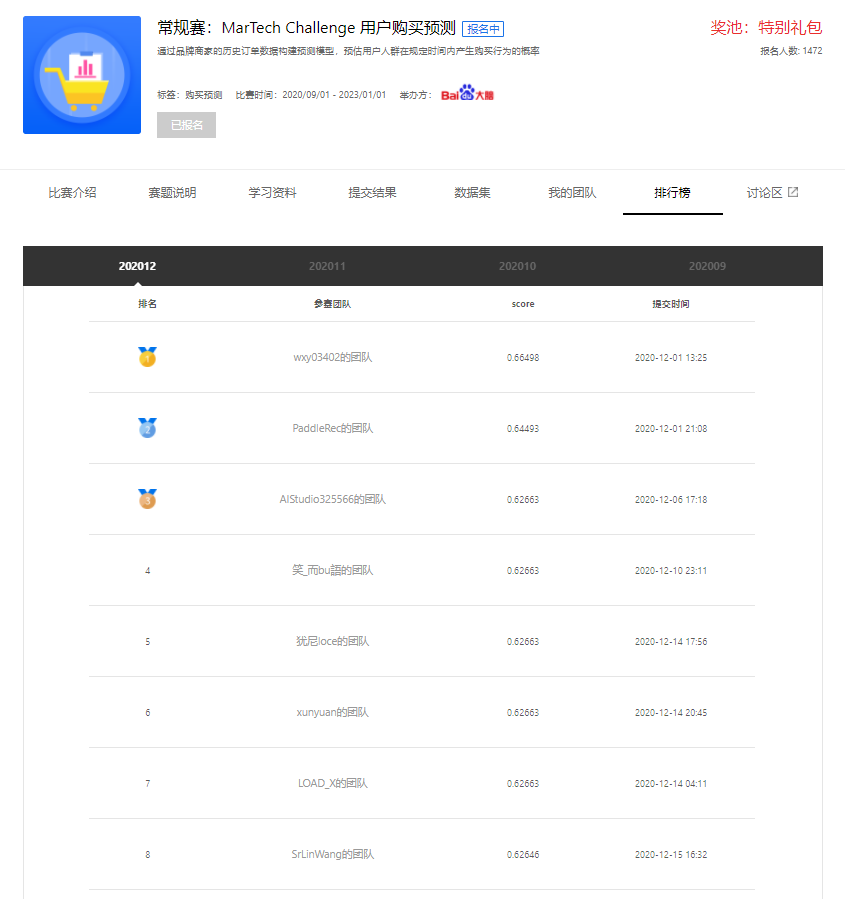